[(0.999798, 33.601866666666666), (0.999494, 33.8093), (0.999426, 31.469800000000003), (0.999335, 30.0217), (0.999231, 28.130033333333333), (0.999086, 26.499233333333336), (0.998913, 24.777533333333338), (0.998691, 23.714366666666667), (0.998394, 21.120633333333334), (0.997938, 19.8754), (0.997436, 18.401500000000002), (0.996846, 16.538166666666665), (0.99615, 14.760066666666665), (0.995263, 13.122766666666669), (0.994217, 11.101833333333332), (0.993723, 10.551499999999999), (0.993188, 10.1504), (0.992581, 9.289423333333334), (0.991939, 8.505686666666668), (0.991274, 7.666673333333333), (0.990932, 7.1479133333333325), (0.990572, 6.98712), (0.990167, 6.67523), (0.989744, 6.43509), (0.989267, 5.898163333333334), (0.988798, 5.661269999999999), (0.988298, 5.50197), (0.987805, 4.911506666666667), (0.987316, 4.743716666666667), (0.986758, 4.095513333333333), (0.986188, 3.7767966666666664), (0.985493, 3.53895), (0.984833, 3.5818399999999997), (0.984176, 3.6249466666666668), (0.983403, 3.663133

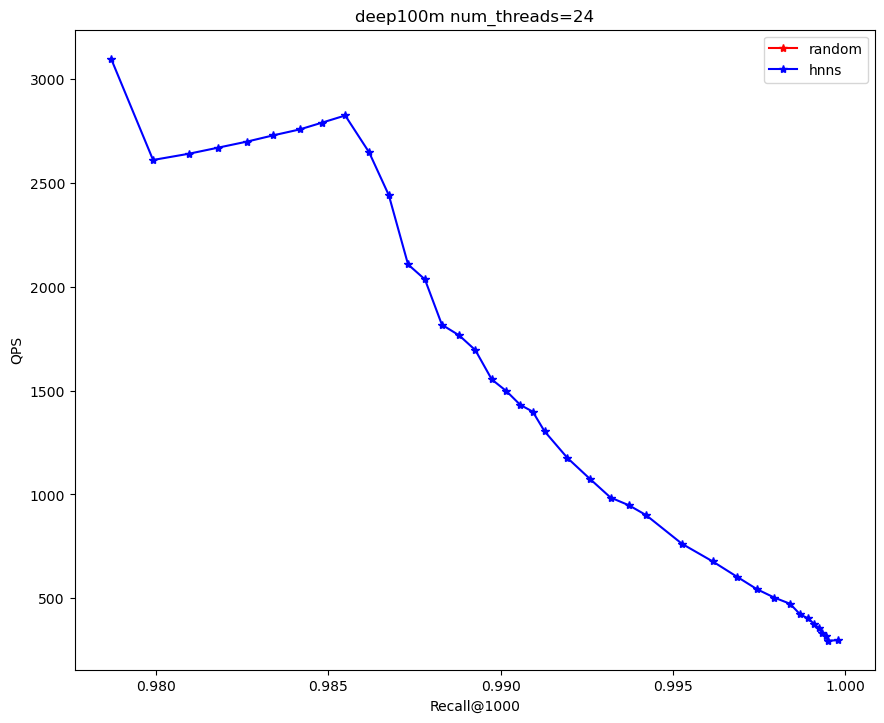

In [7]:
import os
import numpy as np
import json


dataset = 'deep100m'
log_path = "/home/zhengweiguo/liuchengjun/HybridNNS/log/"
config = json.loads(open('config.json').read())
M, efs = config[dataset]["M"], config[dataset]["efs"]
dim = config[dataset]["dim"]
efc = 1000
ck_ts = 2000
k = 1000
method = 'random'

num_threads = 12

# prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.nthread_{num_threads}.{method}.log'
# recall_time_random = []
# logfile_path = os.path.join(log_path, prefix)
# with open (logfile_path, 'r') as f:
#     lines = f.readlines()
#     curr = []
#     for line in lines:
#         if 'model_path' in line: continue
#         if 'Search time: ' in line:
#             curr.append(float(line.split(': ')[1]))
#         elif f'Recall@{k}' in line:
#             avg = np.mean(curr)
#             curr.clear()
#             curr.append(avg)
#             curr.append(float(line.split(': ')[1]))
#             recall_time_random.append((curr[1], curr[0]))
#             curr = []

# print(recall_time_random)

method = 'hnns'
prefix = f'{dataset}.M_{M}.efc_{efc}.efs_{efs}.ck_ts_{ck_ts}.ncheck_100.recall@{k}.nthread_{num_threads}.{method}.log'
recall_time_hnns = []
logfile_path = os.path.join(log_path, prefix)
with open (logfile_path, 'r') as f:
    lines = f.readlines()
    curr = []
    for line in lines:
        if 'model_path' in line: continue
        if 'Search time: ' in line:
            curr.append(float(line.split(': ')[1]))
        elif f'Recall@{k}' in line:
            avg = np.mean(curr)
            curr.clear()
            curr.append(avg)
            curr.append(float(line.split(': ')[1]))
            recall_time_hnns.append((curr[1], curr[0]))
            curr = []

print(recall_time_hnns)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax1 = plt.axes([0.1, 0.1, 0.8, 0.8])  # [left, bottom, width, height]
plt.plot([x[0] for x in recall_time_random], [10000 / x[1] for x in recall_time_random], 'r*-')
plt.plot([x[0] for x in recall_time_hnns], [10000 / x[1] for x in recall_time_hnns], 'b*-')
plt.legend(['random', 'hnns'])
plt.xlabel(f'Recall@1000')
plt.title(f'{dataset} num_threads={num_threads}')
plt.ylabel('QPS')

# ax2 = plt.axes([0.05, 0.6, 0.2, 0.3])  # [left, bottom, width, height]，放置在左上角
# x_zoom_random = [x for x in recall_time_random if 0.998 <= x[0] <= 1.000]
# x_zoom_hnns = [x for x in recall_time_hnns if 0.998 <= x[0] <= 1.000]
# plt.plot([x[0] for x in x_zoom_random], [10000 / x[1] for x in x_zoom_random], 'r*-')
# plt.plot([x[0] for x in x_zoom_hnns], [10000 / x[1] for x in x_zoom_hnns], 'b*-')

plt.show()